**1. 유추문제를 통해 카운트 기반 모델과 예측 기반 모델을 비교하려 한다.**

**(i) 공정한 비교를 위해 2강 연습문제 3-(i) 코드를 수정하여 윈도우 크기 5로 PPMI행렬 구한후 pickle파일에 저장하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch 2') # 각자의 경로로 수정해주세요.
import numpy as np
from common.util import *
from dataset import ptb
import pickle

window_size = 5

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)
data=[C,W]
with open('data5.pkl', 'wb') as f:
    pickle.dump(data,f)
print("Saved!")

동시발생 수 계산 ...
PPMI 계산 ...


C://Users//HAN//Documents//Deep Learning from Scratch 2\common\util.py:141: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
C://Users//HAN//Documents//Deep Learning from Scratch 2\common\util.py:141: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
Saved!


**(ii) eval.py를 수정하여 카운트 기반 모델로 유추문제를 푸시오. 공정한 비교를 위해 SVD를 적용해 벡터표현 차원을 100으로 줄이고 시작하시오. (count$\_$method$\_$big.py 참고)**

In [2]:
with open('data5.pkl', 'rb') as f:
    data=pickle.load(f)
print("Loaded!")
W=data[1]
wordvec_size=100

from sklearn.utils.extmath import randomized_svd
U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,random_state=None)

word_vecs = U[:, :wordvec_size]

# 가장 비슷한(most similar) 단어 뽑기
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

# 유추(analogy) 작업
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs)

Loaded!

[query] you
 do: 0.669205904006958
 i: 0.655455470085144
 going: 0.6466537117958069
 'll: 0.5788818597793579
 're: 0.5642545223236084

[query] year
 earlier: 0.7392768859863281
 month: 0.6328058242797852
 quarter: 0.6023010015487671
 fiscal: 0.5877283811569214
 last: 0.5870315432548523

[query] car
 luxury: 0.7945468425750732
 auto: 0.7509857416152954
 cars: 0.7378336191177368
 beretta: 0.6997184753417969
 ford: 0.6835254430770874

[query] toyota
 honda: 0.8579298853874207
 motor: 0.8500784039497375
 nissan: 0.8198772668838501
 lexus: 0.7978178262710571
 mazda: 0.7694302797317505
--------------------------------------------------

[analogy] king:man = queen:?
 his: 0.09136325865983963
 her: 0.0873655304312706
 who: 0.0864451453089714
 death: 0.06817392259836197
 black: 0.062231581658124924

[analogy] take:took = go:?
 into: 0.07094679027795792
 university: 0.06208224594593048
 hours: 0.05847660452127457
 who: 0.05637441575527191
 signed: 0.055976249277591705

[analogy] car:car

**2.(i) train.py를 수정하여 PTB 데이터셋으로 Skip-Gram 모델을 훈련시킨후 파라미터들을 pickle파일에 저장하시오.**

train.py에서 Skip-Gram 주석을 지우고 CBOW에 주석을 표시하면 코드 수정은 매우 간단합니다.  
그런데 학습 시간이 매우 오래 걸립니다.  
피클 파일을 자료실에서 다운로드 받으실수 있습니다.

**(ii) eval.py를 수정하여 위에서 학습시킨 Skip-Gram 모델로 유추문제를 푸시오. CBOW 모델에 못미치는 이유를 설명하시오.**

eval.py에서 Skip-Gram 피클 파일 주석을 지우고 CBOW 피클 파일에 주석을 표시하면 코드수정은 매우 간단합니다.

CBOW모델에서는 왼쪽 5단어, 오른쪽 5단어를 보여주고 중앙의 단어를 맞추는 문제를 풉니다.  
반면에 Skip-Gram 모델에서는 중앙의 단어를 보여주고 왼쪽 5단어 오른쪽 5단어를 맞추는 문제를 풉니다.  
Skip-Gram 모델이 훨씬 어려운 문제를 푼다고 볼수 있습니다.  
이때문에 학습 데이터셋이 적을때는 CBOW 모델이 Skip-Gram모델보다 뛰어납니다.  
하지만 학습 데이터셋이 많아지면 성능이 역전됩니다.  
PTB 데이터셋으로 훈련시킨 Skip-Gram 모델이 더 성능이 떨어지는 이유는 PTB 데이터셋이 충분히 크지 않기 때문입니다.

In [3]:
pkl_file = 'skipgram_params.pkl'

with open(pkl_file, 'rb') as f:
    params = pickle.load(f)
    word_vecs = params['word_vecs']
    word_to_id = params['word_to_id']
    id_to_word = params['id_to_word']

# 가장 비슷한(most similar) 단어 뽑기
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

# 유추(analogy) 작업
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs)


[query] you
 your: 0.6650390625
 yourself: 0.65625
 i: 0.6484375
 weird: 0.62255859375
 someone: 0.611328125

[query] year
 month: 0.626953125
 earlier: 0.5947265625
 week: 0.5390625
 fiscal: 0.52490234375
 tons: 0.5078125

[query] car
 cars: 0.61474609375
 luxury: 0.5888671875
 auto: 0.56640625
 merkur: 0.55078125
 mazda: 0.51904296875

[query] toyota
 lexus: 0.6728515625
 motor: 0.66796875
 honda: 0.64453125
 beretta: 0.62158203125
 corsica: 0.60546875
--------------------------------------------------

[analogy] king:man = queen:?
 duck: 1.74609375
 violin: 1.7373046875
 mystery: 1.6748046875
 peasants: 1.669921875
 hero: 1.6669921875

[analogy] take:took = go:?
 feet: 1.7421875
 ran: 1.595703125
 walked: 1.5810546875
 bounced: 1.5478515625
 clothes: 1.5361328125

[analogy] car:cars = child:?
 rape: 2.30078125
 incest: 2.001953125
 children: 1.890625
 adults: 1.845703125
 conception: 1.763671875

[analogy] good:better = bad:?
 comparable: 1.7890625
 hemorrhaging: 1.603515625
 impre

**3. 통계학 시간에 배운 PCA가 얼마나 효율적인 차원축소 방법인지 유추문제로 확인하려 한다.**

**(i) 인터넷에서 사이킷런의 PCA 클래스 사용법을 검색하시오.**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**(ii) eval.py를 수정하여 PCA로 단어의 벡터 표현  차원을 20만큼 줄 후 유추문제를 푸시오.**

차원을 줄이면 정보의 손실은 어쩔수 없습니다.  
PCA는 정보의 손실을 최소화 하면서 차원을 축소합니다.  
데이터 크기가 5분의 1로 줄어들었음에도 꽤 괜찮은 성능을 보여주네요.

In [4]:
from sklearn.decomposition import PCA

pkl_file = "C://Users//HAN//Documents//Deep Learning from Scratch 2//ch04//CBOW_params.pkl" # 각자의 경로로 수정해주세요.

with open(pkl_file, 'rb') as f:
    params = pickle.load(f)
    word_vecs = params['word_vecs']
    word_to_id = params['word_to_id']
    id_to_word = params['id_to_word']

dim=20

pca = PCA(n_components = dim)
word_vecs_pca = pca.fit_transform(word_vecs)

# 가장 비슷한(most similar) 단어 뽑기
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs_pca, top=5)

# 유추(analogy) 작업
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs_pca)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs_pca)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs_pca)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs_pca)


[query] you
 i: 0.8634117301889785
 somebody: 0.8060132869624443
 funny: 0.7741206381506127
 ducks: 0.7695721003178375
 something: 0.7576639457594565

[query] year
 month: 0.8377124308838939
 week: 0.7412077170238015
 decade: 0.7004211371946338
 forecast: 0.6875490740647041
 summer: 0.6764615591851495

[query] car
 agricultural: 0.7840540849386594
 roller-coaster: 0.7035440435284384
 rallied: 0.702591475402375
 chip: 0.7000096946595926
 channel: 0.6837276645052299

[query] toyota
 nissan: 0.7808465456200856
 marathon: 0.7586939571936531
 bethlehem: 0.7544656749574457
 shops: 0.7469318484870098
 steel: 0.7403631693787304
--------------------------------------------------

[analogy] king:man = queen:?
 woman: 6.161758361548049
 veto: 4.903379893251138
 successor: 4.63441610024114
 ton: 4.377339888015118
 father: 4.368269107096116

[analogy] take:took = go:?
 're: 5.666297477051941
 went: 5.30941401547515
 became: 5.209783647318223
 was: 5.20170574666767
 began: 4.849133550133815

[analo

**(iii) eval.py를 수정하여 단어의 벡터 표현을 단순히 앞에서 20차원 만큼 자른 후 유추문제를 푸시오.**

데이터가 5분의 1로 줄은만큼 성능이 형편없이 떨어졌습니다.  
차원축소를 할때 축을 정교하게 잡는게 얼마나 중요한지 느낄수 있네요.

In [5]:
word_vecs_nonpca = word_vecs[:,:dim]

# 가장 비슷한(most similar) 단어 뽑기
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs_nonpca, top=5)

# 유추(analogy) 작업
print('-'*50)
analogy('king', 'man', 'queen',  word_to_id, id_to_word, word_vecs_nonpca)
analogy('take', 'took', 'go',  word_to_id, id_to_word, word_vecs_nonpca)
analogy('car', 'cars', 'child',  word_to_id, id_to_word, word_vecs_nonpca)
analogy('good', 'better', 'bad',  word_to_id, id_to_word, word_vecs_nonpca)


[query] you
 shorter: 0.828125
 definitely: 0.779296875
 i: 0.75634765625
 me: 0.75341796875
 someone: 0.748046875

[query] year
 bikers: 0.72509765625
 misstated: 0.71484375
 week: 0.7109375
 month: 0.6845703125
 spring: 0.6787109375

[query] car
 fortune: 0.78759765625
 seen: 0.765625
 balloon: 0.7607421875
 risk: 0.75830078125
 republics: 0.748046875

[query] toyota
 charts: 0.75439453125
 therefore: 0.7529296875
 rebel: 0.71875
 samples: 0.69677734375
 metal: 0.68896484375
--------------------------------------------------

[analogy] king:man = queen:?
 analyst: 4.42578125
 nation: 4.05859375
 economist: 4.0234375
 spokeswoman: 3.931640625
 fund: 3.77734375

[analogy] take:took = go:?
 &: 4.65234375
 can: 3.62890625
 she: 3.6015625
 my: 3.546875
 off: 3.5390625

[analogy] car:cars = child:?
 down: 3.0625
 spending: 3.01953125
 far: 2.96484375
 eggs: 2.955078125
 compared: 2.806640625

[analogy] good:better = bad:?
 she: 3.76953125
 as: 3.74609375
 longer: 3.0859375
 average: 2.886

**4. PCA를 이용해 CBOW 모델의 유추문제에 대한 이해를 기하학적으로 시각화하려 한다.**

**(i) 네 단어 king, man, queen, woman의 벡터 표현에 PCA를 적용해서 차원을 2만큼 줄인후 산포도로 시각화 하시오.**
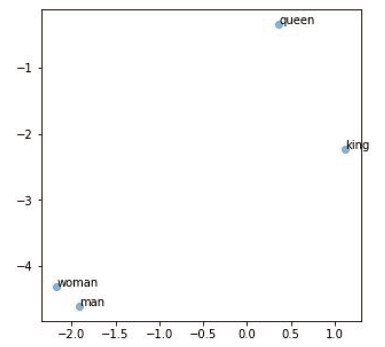

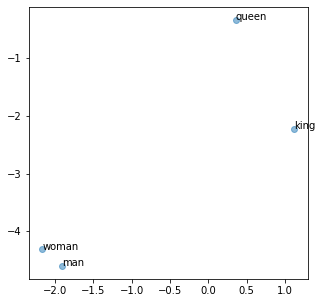

In [6]:
import matplotlib.pylab as plt

pca = PCA(n_components = 2)
word_vecs = pca.fit_transform(word_vecs)

plt.figure(figsize=(5,5))
positions=[]

for word in ('king','man','queen','woman'):
    vec = word_vecs[word_to_id[word]]
    positions.append(vec)
    plt.annotate(word,vec)

positions = np.array(positions)
plt.scatter(positions[:,0], positions[:,1], alpha=0.5)
plt.show()

**(ii) 기하학적 의미를 해석하시오.**
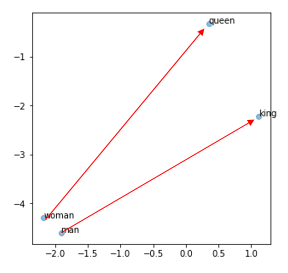

**(iii) 나머지 조합 take, took, go, went와 car, cars, child, children와 good, better, bad, worse에 대해서도 같은 작업을 하시오.**

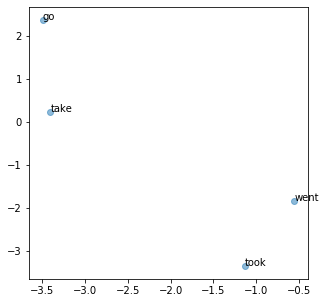

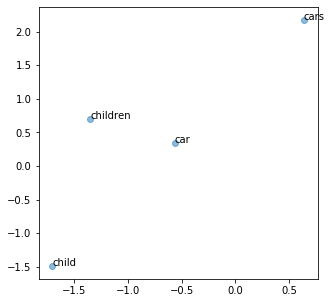

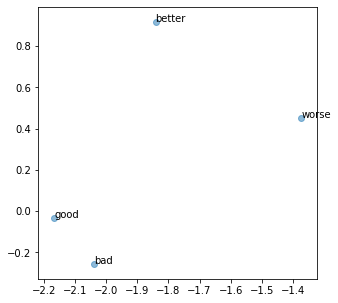

In [7]:
plt.figure(figsize=(5,5))
positions=[]

for word in ('take','took','go','went'):
    vec = word_vecs[word_to_id[word]]
    positions.append(vec)
    plt.annotate(word,vec)

positions = np.array(positions)
plt.scatter(positions[:,0], positions[:,1], alpha=0.5)
plt.show()


plt.figure(figsize=(5,5))
positions=[]

for word in ('car','cars','child','children'):
    vec = word_vecs[word_to_id[word]]
    positions.append(vec)
    plt.annotate(word,vec)

positions = np.array(positions)
plt.scatter(positions[:,0], positions[:,1], alpha=0.5)
plt.show()


plt.figure(figsize=(5,5))
positions=[]

for word in ('good','better','bad','worse'):
    vec = word_vecs[word_to_id[word]]
    positions.append(vec)
    plt.annotate(word,vec)

positions = np.array(positions)
plt.scatter(positions[:,0], positions[:,1], alpha=0.5)
plt.show()

기하학적으로 벡터로 표시하면 다음과 같습니다.
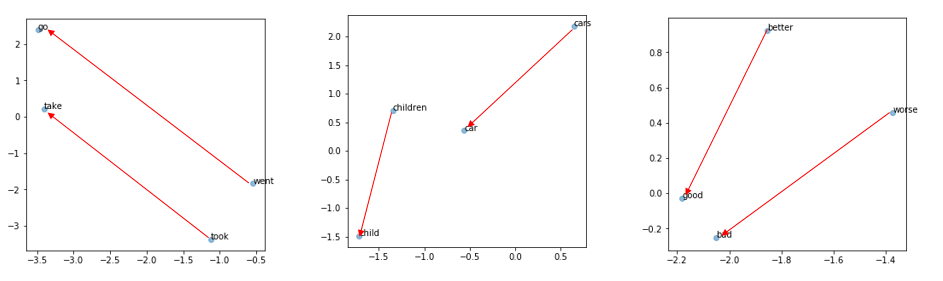